In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Tarefa 4 - Decision Trees, Random Forest and K-Means
Fourth assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using decision trees and random forests to solve a real-world problem in classification and delve into the world of unsupervised learning by implementing the K-means algorithm. Students will also get used to generating important plots during training to analyse the models' behaviour. 

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Decision Trees](#Decision_Trees) (30%)
2. [Random Forest](#Random_Forest) (30%)
3. [K-Means](#K-Means) (30%)

### Decision_Trees
## Part 1 - Decision Trees for Classification (value: 30%)

In [2]:
# load the data
ddi_df = pd.read_csv('ddi_dt_sample.csv') # don't forget to change the path

In [3]:
# inspect the data
ddi_df

,drug1,drug2,ddi,pca_max_0,pca_max_1,pca_max_2,pca_max_3,pca_max_4,pca_max_5,pca_max_6,...,pca_min_17,pca_min_18,pca_min_19,pca_min_20,pca_min_21,pca_min_22,pca_min_23,pca_min_24,pca_min_25,pca_min_26
0,CID000002725,CID000013342,0.0,-2.383210,-0.066904,0.051153,0.058145,0.398508,0.215271,-0.267814,...,-0.366350,-1.091191,-1.021989,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.091330,-0.195522
1,CID000002802,CID000013342,0.0,-2.554958,-0.066904,0.053715,0.058145,0.398508,0.131852,-0.267814,...,-0.366350,0.106596,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
2,CID000002083,CID000013342,0.0,9.908402,-0.066904,0.122384,0.058145,0.398508,0.098734,0.041276,...,-0.366350,0.102901,0.010149,-0.088365,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
3,CID000004034,CID000013342,0.0,-2.547375,-0.066904,0.051884,0.058145,0.398508,0.203962,-0.267814,...,-0.366350,-1.011102,-0.944133,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
4,CID000003899,CID000013342,0.0,-2.554958,-0.066904,0.051083,0.058145,0.398508,0.138126,-0.267814,...,-0.366350,0.075010,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,CID000002083,CID000002160,1.0,10.213277,-0.355555,0.122384,0.024324,0.144197,0.286870,0.041276,...,-0.743211,-0.148822,0.030291,-0.088365,-0.131963,0.010439,0.014404,-0.130975,0.003776,-0.043334
776,CID000002088,CID000002160,1.0,10.213277,-0.355555,0.048850,-0.064623,0.097114,0.286870,-0.235796,...,-0.743211,-0.148822,0.041925,-0.106078,-0.131963,0.157741,-0.055455,-0.130975,-0.030832,-0.053976
777,CID000001206,CID000002160,0.0,10.213277,-0.355555,-0.210680,-0.646083,-0.111940,0.290024,-0.235796,...,-1.269156,-0.148822,0.259326,-0.247741,-0.193907,0.076300,0.023777,-0.130975,0.006320,-0.070912
778,CID000002118,CID000002160,1.0,10.213277,-0.355555,0.062143,-0.017338,0.059182,0.286870,-0.235796,...,-0.743211,-0.148822,0.059779,-0.072749,-0.131963,0.077367,0.026625,-0.130975,-0.021027,-0.047147


As you can observe, the first 2 columns represent the IDs of the drugs in each combination. The 3rd column represents the binary label indicating if the pair causes an adverse interaction or not. The remaining 54 columns are the features based on the PCA representations of individual drug targets. 

In [54]:
## your code goes here:
np.random.seed(50)
y = ddi_df["ddi"].to_numpy()
X = ddi_df.drop(["drug1", "drug2", "ddi"], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(f"X_train: {X_train.shape} - y_train: {y_train.shape}")
print(f"X_test: {X_test.shape} - y_test: {y_test.shape}")

# divide a região
def split_region(region: np.ndarray, feature_index: int, tau: float) -> tuple:
    """
    Divide uma região em duas partes com base em um recurso e um valor de divisão.

    Args:
        region (np.ndarray): A região a ser dividida.
        feature_index (int): O índice do recurso pelo qual a região será dividida.
        tau (float): O valor de divisão para o recurso.

    Returns:
        tuple: Uma tupla contendo os índices dos pontos na região que estão à esquerda e à direita da divisão.
    """
    left_partition = np.where(region[:, feature_index] < tau)[0]
    right_partition = np.where(region[:, feature_index] >= tau)[0]

    return left_partition, right_partition

# função para calcular a entropia (da mesma forma que está no slide, usando o log2 para classificação binária)
def entropia(y: np.ndarray) -> float:
    """
    Calcula a entropia de um conjunto de rótulos.

    Args:
        y (np.ndarray): Os rótulos do conjunto de dados.

    Returns:
        float: O valor da entropia.
    """
    unique, counts = np.unique(y, return_counts=True)
    prob = counts / len(y)
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

# vai calcular o ganho de informação, ou seja, na prática a vantagem de fazer aquela divisão
def ganho_informacao(y: np.ndarray, y_left: np.ndarray, y_right: np.ndarray) -> float:
    """
    Calcula o ganho de informação resultante de uma divisão.

    Args:
        y (np.ndarray): Os rótulos do conjunto de dados original.
        y_left (np.ndarray): Os rótulos do conjunto de dados à esquerda da divisão.
        y_right (np.ndarray): Os rótulos do conjunto de dados à direita da divisão.

    Returns:
        float: O ganho de informação resultante da divisão.
    """
    H = entropia(y)
    H_left = entropia(y_left)
    H_right = entropia(y_right)
    p_left = len(y_left) / len(y)
    p_right = len(y_right) / len(y)
    W = p_left * H_left + p_right * H_right
    info_gain = H - W
    return info_gain

# escolhe a melhor divisão
def get_split(X:np.ndarray, y:np.ndarray):
    """
    Encontra a melhor divisão para um conjunto de dados.

    Args:
        X (np.ndarray): Os dados de entrada.
        y (np.ndarray): Os rótulos correspondentes.

    Returns:
        dict: Um dicionário contendo informações sobre a melhor divisão encontrada.
    """
    max_info_gain = -np.inf
    best_feature = 0
    best_tau = 0
    best_left = np.array([])
    best_right = np.array([])
    
    for each_feature in range(X.shape[1]):
        for each_tau in np.unique(X[:, each_feature]):
            left, right = split_region(X, each_feature, each_tau)

            # usa os índices para dividir o target
            y_left = y[left]
            y_right = y[right]

            # calcula o ganho de informação
            info_gain = ganho_informacao(y, y_left, y_right)

            # vai selecionar a divisão que proporciona o maior ganho de informação
            if info_gain > max_info_gain:
                max_info_gain = info_gain
                best_feature = each_feature
                best_tau = each_tau
                best_left = left
                best_right = right

    return {"feature_index": best_feature, "tau": best_tau, "left_region": best_left, "left": None, "right_region": best_right, "right": None}

# recebe um array, referente à uma região, e retorna a classe dominante daquela região (necessário para classificação)
def classe_dominante(y:np.ndarray) -> int:
    """
    Determina a classe dominante em um conjunto de rótulos.

    Args:
        y (np.ndarray): Os rótulos do conjunto de dados.

    Returns:
        int: A classe dominante.
    """
    # se tiver mais 1 do que 0, a média vai ser maior que meio e o round retorna 1
    # caso contrário, ele arredonda pra baixo, e retorna 0
    # meio que nesse ponto eu aplico o treshhold (0.5) que deveriamos usar para a acurácia
    return round(np.mean(y), 0)

# gera o crescimento recursivo da árvore de decisão
def recursive_growth(node: dict, min_samples: int, max_depth: int, current_depth: int, X: np.ndarray, y: np.ndarray) -> dict:
    """
    Realiza o crescimento recursivo de uma árvore de decisão.

    Args:
        node (dict): O nó atual da árvore.
        min_samples (int): O número mínimo de amostras para continuar dividindo.
        max_depth (int): A profundidade máxima da árvore.
        current_depth (int): A profundidade atual da árvore.
        X (np.ndarray): Os dados de entrada.
        y (np.ndarray): Os rótulos correspondentes.

    Returns:
        dict: O nó atualizado da árvore após o crescimento recursivo.
    """
    # Condições de parada
    if len(y) <= min_samples or current_depth >= max_depth:
        node["classe"] = classe_dominante(y)
        node["value"] = np.mean(y)
        return node
    
    X_left = X[node["left_region"]]
    y_left = y[node["left_region"]]
    X_right = X[node["right_region"]]
    y_right = y[node["right_region"]]

    if len(y_left) > 0 and len(y_right) > 0:
        left_node = get_split(X_left, y_left)
        right_node = get_split(X_right, y_right)

        node["left"] = left_node
        node["right"] = right_node

        node["left"] = recursive_growth(left_node, min_samples, max_depth, current_depth + 1, X_left, y_left)
        node["right"] = recursive_growth(right_node, min_samples, max_depth, current_depth + 1, X_right, y_right)
    else:
        node["classe"] = classe_dominante(y)
        node["value"] = np.mean(y)

    return node

# função auxiliar, que usei apenas para verificar se tudo estava funcionando corretamente
def print_tree(node:dict, depth:int=0) -> None:
    """
    Imprime a árvore de decisão.

    Args:
        node (dict): O nó atual da árvore.
        depth (int): A profundidade atual da árvore.
    """
    indent = "----" * depth
    if "classe" in node:
        print(f"{indent}Leaf: {node['classe']}")
    else:
        print(f"{indent}Feature {node['feature_index']} < {node['tau']}")
        print(f"{indent}Left:")
        print_tree(node["left"], depth + 1)
        print(f"{indent}Right:")
        print_tree(node["right"], depth + 1)

# função que tinha feito no lab, para preizir uma amostra específica
def predict_sample(node:dict, sample:np.ndarray, chave:str) -> float:
    """
    Realiza a previsão para uma amostra específica.

    Args:
        node (dict): O nó atual da árvore.
        sample (np.ndarray): A amostra para a qual fazer a previsão.
        chave (str): A chave para determinar o tipo de previsão.

    Returns:
        float: O resultado da previsão.
    """

    # vai retornar 0 ou 1, com treshhold de 0.5 (classifica na construção da própria árvore)
    if chave == "acuracia":
        while "classe" not in node:
            if sample[node["feature_index"]] < node["tau"]:
                node = node["left"]
            else:
                node = node["right"]
        return node["classe"]
    
    # vai retornar um float
    elif chave == "auroc":
        while "value" not in node:
            if sample[node["feature_index"]] < node["tau"]:
                node = node["left"]
            else:
                node = node["right"]
        return node["value"]
    
    else:
        return None
        

# função feita no lab para predizir uma série de datapoints
def predict(node:dict, X:np.ndarray, chave:str) -> np.ndarray:
    """
    Realiza a previsão para um conjunto de dados.

    Args:
        node (dict): O nó raiz da árvore de decisão.
        X (np.ndarray): Os dados de entrada.
        chave (str): A chave para determinar o tipo de previsão.

    Returns:
        np.ndarray: As previsões para o conjunto de dados.
    """
    y_temp = np.zeros((X.shape[0], 1))
    for each_datapoint in range(X.shape[0]):
        y_temp[each_datapoint] = predict_sample(node, X[each_datapoint,:], chave)
    return y_temp

# função que calcula a acurácia 
def acuracia(y_pred:np.ndarray, y_true:np.ndarray) -> float:
    """
    Calcula a acurácia das previsões.

    Args:
        y_pred (np.ndarray): As previsões.
        y_true (np.ndarray): Os rótulos verdadeiros.

    Returns:
        float: A acurácia das previsões.
    """
    acertos = 0

    for each_row in range(len(y_pred)):
        if y_pred[each_row] == y_true[each_row]:
            acertos += 1

    total = len(y_true)
    return acertos / total

# validação cruzada
X_1, X_temp, y_1, y_temp = train_test_split(X_train, y_train, test_size=2/3)
X_2, X_3, y_2, y_3 = train_test_split(X_temp, y_temp, test_size=0.5)

# inicialização de variáveis
list_X = [X_1, X_2, X_3]
list_y = [y_1, y_2, y_3]
list_acuracia = [0, 0, 0]
dict_auroc = {4:0, 6:0, 8:0}

# loop para aplicar a validação cruzada
for i in range(3):
    X_val_temp = list_X[i]
    y_val_temp = list_y[i]
    X_train_temp = np.concatenate([list_X[j] for j in range(3) if j != i])
    y_train_temp = np.concatenate([list_y[j] for j in range(3) if j != i])

    for j in [4, 6, 8]:
        root_node_temp = get_split(X_train_temp, y_train_temp)
        arvore_temp = recursive_growth(root_node_temp, 15, j, 0, X_train_temp, y_train_temp)

        y_pred_acuracia = predict(arvore_temp, X_test, "acuracia")
        y_pred_auroc = predict(arvore_temp, X_test, "auroc")

        if j == 4:
            list_acuracia[0] += acuracia(y_pred_acuracia, y_test)/3
        elif j == 6:
            list_acuracia[1] += acuracia(y_pred_acuracia, y_test)/3
        else:
            list_acuracia[2] += acuracia(y_pred_acuracia, y_test)/3

        dict_auroc[j] += roc_auc_score(y_test, y_pred_auroc)/3

# validação dos códigos
print("\nAcurácias Médias: ")
print(f"- Profundidade = 4: {list_acuracia[0]}")
print(f"- Profundidade = 6: {list_acuracia[1]}")
print(f"- Profundidade = 8: {list_acuracia[2]}")

print(f"\nAUROC Média: ")
print(f"- Profundidade = 4: {dict_auroc[4]}")
print(f"- Profundidade = 6: {dict_auroc[6]}")
print(f"- Profundidade = 8: {dict_auroc[8]}")


# previsão final
root_node = get_split(X_train, y_train)
arvore = recursive_growth(root_node_temp, 15, 8, 0, X_train, y_train)

y_pred_acuracia = predict(arvore, X_test, "acuracia")
y_pred_auroc = predict(arvore, X_test, "auroc")

print(f"\nAcurácia Final: {acuracia(y_pred_acuracia, y_test)}")
print(f"AUROC Final: {roc_auc_score(y_test, y_pred_auroc)}")

X_train: (702, 54) - y_train: (702,)
X_test: (78, 54) - y_test: (78,)

Acurácias Médias: 
- Profundidade = 4: 0.7564102564102564
- Profundidade = 6: 0.7905982905982905
- Profundidade = 8: 0.7564102564102564

AUROC Média: 
- Profundidade = 4: 0.8294051627384962
- Profundidade = 6: 0.841638608305275
- Profundidade = 8: 0.8455667789001124

Acurácia Final: 0.7948717948717948
AUROC Final: 0.8528619528619528


## Random_Forest
## Part 2 - Random Forest for Classification Networks (value: 30%)



# Passo a Passo

### Passos Iniciais

1. Inicializar, novamente, os dados;
2. Definir alguns parâmetros que serão usados ao longo do código;
3. Atualizando algumas funções da parte 1;

In [55]:
# divisão dos dados
y = ddi_df["ddi"].to_numpy()
X = ddi_df.drop(["drug1", "drug2", "ddi"], axis=1).to_numpy()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

# parâmetros
m = int(np.sqrt(X.shape[1]))
num_random_forrest = 15
random_forrest = list()

# uma nova versão da função listada acima, que passa a considerar diferentes features
def get_split_randon(X:np.ndarray, y:np.ndarray, m:int) -> dict:
    """
    Encontra a melhor divisão para um conjunto de dados, considerando aleatoriamente um subconjunto de recursos.

    Args:
        X (np.ndarray): Os dados de entrada.
        y (np.ndarray): Os rótulos correspondentes.
        m (int): O número de recursos a serem considerados aleatoriamente para divisão.

    Returns:
        dict: Um dicionário contendo informações sobre a melhor divisão encontrada.
    """
    max_info_gain = -np.inf
    best_feature = 0
    best_tau = 0
    best_left = np.array([])
    best_right = np.array([])

    # vai escolher um conjunto de m features, de forma aleatoria, para poder avaliar qual usar para dividir
    for each_feature in np.random.choice(X.shape[1], m, replace=False):
        for each_tau in np.unique(X[:, each_feature]):
            left, right = split_region(X, each_feature, each_tau)

            # usa os índices para dividir o target
            y_left = y[left]
            y_right = y[right]

            # calcula o ganho de informação
            info_gain = ganho_informacao(y, y_left, y_right)

            # vai selecionar a divisão que proporciona o maior ganho de informação
            if info_gain > max_info_gain:
                max_info_gain = info_gain
                best_feature = each_feature
                best_tau = each_tau
                best_left = left
                best_right = right

    return {"feature_index": best_feature, "tau": best_tau, "left_region": best_left, "left": None, "right_region": best_right, "right": None}

# recebe a floresta, e classifica com base na classe majoritária
def predict_sample_random(floresta_aleatória:list, sample:np.ndarray, chave:str) -> float:
    """
    Realiza a previsão para uma amostra específica usando uma floresta aleatória.

    Args:
        floresta_aleatoria (list): A lista de árvores na floresta.
        sample (np.ndarray): A amostra para a qual fazer a previsão.
        chave (str): A chave para determinar o tipo de previsão.

    Returns:
        float: O resultado da previsão.
    """
    sum = 0

    if chave == "acuracia":
        for arvore in floresta_aleatória:
            while "classe" not in arvore:
                if sample[arvore["feature_index"]] < arvore["tau"]:
                    arvore = arvore["left"]
                else:
                    arvore = arvore["right"]
            sum += arvore["classe"]
        
        # vai retornar um int (já classificando)
        if sum >= int(len(floresta_aleatória)/2):
            return 1
        else:
            return 0
        
    elif chave == "auroc":
        for arvore in floresta_aleatória:
            while "classe" not in arvore:
                if sample[arvore["feature_index"]] < arvore["tau"]:
                    arvore = arvore["left"]
                else:
                    arvore = arvore["right"]
            sum += arvore["classe"]

        # vai retornar um float (a média dos dos rótulos de todas as florestas)
        return sum/len(floresta_aleatória)

    else:
        return None

# utiliza a função acima para classificar todos os dados     
def predict_random(floresta_aleatoria:list, X:np.ndarray, chave:str) -> :np.ndarray:
    """
    Realiza a previsão para um conjunto de dados usando uma floresta aleatória.

    Args:
        floresta_aleatoria (list): A lista de árvores na floresta.
        X (np.ndarray): Os dados de entrada.
        chave (str): A chave para determinar o tipo de previsão.

    Returns:
        np.ndarray: As previsões para o conjunto de dados.
    """
    y_temp = np.zeros((X.shape[0], 1))
    for each_datapoint in range(X.shape[0]):
        y_temp[each_datapoint] = predict_sample_random(floresta_aleatoria, X[each_datapoint,:], chave)
    return y_temp

# recebe alguns parâmetros, treina uma floaresta aleatória, e retorna a AUROC e a acurácia
def fun_random_forrest(X:np.ndarray, y:np.ndarray, num_arvores:int, min_samples:int, max_profundidade:int) -> tuple:
    """
    Treina uma floresta aleatória e calcula a AUROC e a acurácia.

    Args:
        X (np.ndarray): Os dados de entrada.
        y (np.ndarray): Os rótulos correspondentes.
        num_arvores (int): O número de árvores na floresta.
        min_samples (int): O número mínimo de amostras para continuar dividindo.
        max_profundidade (int): A profundidade máxima das árvores.

    Returns:
        tuple: Uma tupla contendo a AUROC, a acurácia e a floresta aleatória treinada.
    """
    random_forrest = list()
            
    # vai treinar uma quantidade determinada de árvores de decisão
    for i in range(num_arvores):
        indices = np.random.choice(len(X), len(X))

        X_temp = X[indices]
        y_temp = y[indices]

        root_node_temp = get_split(X_temp, y_temp)
        arvore_temp = recursive_growth(root_node_temp, min_samples, max_profundidade, 0, X_temp, y_temp)

        random_forrest.append(arvore_temp)

    # vai usar as árvores treinadas (que vão compor a floresta) para fazer a previsão
    y_pred_acuracia = predict_random(random_forrest, X, "acuracia")
    y_pred_auroc = predict_random(random_forrest, X, "auroc")

    # vai retornar a auroc e a acurácia para o conjunto usado para o treino e a floresta treinada 
    return roc_auc_score(y, y_pred_auroc), acuracia(y_pred_acuracia, y), random_forrest

# OBS: O treshhold está sendo considerado na própria construção da árvore
# na hora de decidir o valor de uma folha, se for maior que 0.5 vira 1
# caso contrário vira 0, da mesma forma que aconteca na primeira parte

### Testando Combinações de Hiperparâmetros

4. Definindo quais são os melhores hiperparâmetros (usando o conjunto de validação);

No total, vou treinar 3 hiperparâmetros: o número de árvores, a profundidade máxima e o número mínimo de samples. Para cada hiperparâmetro, vou testar 3 valores e descobrir qual das 27 combinações resulta na melhor AUROC. 

In [56]:
# hiperparâmetros que serão analisados
num_arvores = [5, 10, 15]
profundidade = [2, 4, 6]
num_samples = [15, 20, 25]

# vai armazenar as AUROCs para os diferentes hiperparâmetros
dict_auroc = dict()

contador = 0

# são necessários 3 loops for para testar as combinações
for cada_num_arvore in num_arvores:
    for cada_profundidade in profundidade:
        for cada_num_sample in num_samples:

            # calcula e adiciona as AUROC
            dict_auroc[f"{cada_num_arvore} - {cada_profundidade} - {cada_num_sample}"] = fun_random_forrest(X_val, y_val, cada_num_arvore, cada_num_sample, cada_profundidade)[0]

            # apenas para pode acompanhar o andamento do código
            contador += 1
            print(str(contador) + " ", end="", sep=" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 

### Analisando as Combinações

In [57]:
for each_key, each_value in dict_auroc.items():
    print(f"Parâmetros: {each_key} - AUROC: {each_value:.3f}")

Parâmetros: 5 - 2 - 15 - AUROC: 0.914
Parâmetros: 5 - 2 - 20 - AUROC: 0.901
Parâmetros: 5 - 2 - 25 - AUROC: 0.914
Parâmetros: 5 - 4 - 15 - AUROC: 0.990
Parâmetros: 5 - 4 - 20 - AUROC: 0.961
Parâmetros: 5 - 4 - 25 - AUROC: 0.959
Parâmetros: 5 - 6 - 15 - AUROC: 0.974
Parâmetros: 5 - 6 - 20 - AUROC: 0.948
Parâmetros: 5 - 6 - 25 - AUROC: 0.968
Parâmetros: 10 - 2 - 15 - AUROC: 0.944
Parâmetros: 10 - 2 - 20 - AUROC: 0.917
Parâmetros: 10 - 2 - 25 - AUROC: 0.931
Parâmetros: 10 - 4 - 15 - AUROC: 0.988
Parâmetros: 10 - 4 - 20 - AUROC: 0.981
Parâmetros: 10 - 4 - 25 - AUROC: 0.964
Parâmetros: 10 - 6 - 15 - AUROC: 0.976
Parâmetros: 10 - 6 - 20 - AUROC: 0.989
Parâmetros: 10 - 6 - 25 - AUROC: 0.966
Parâmetros: 15 - 2 - 15 - AUROC: 0.940
Parâmetros: 15 - 2 - 20 - AUROC: 0.958
Parâmetros: 15 - 2 - 25 - AUROC: 0.961
Parâmetros: 15 - 4 - 15 - AUROC: 0.998
Parâmetros: 15 - 4 - 20 - AUROC: 0.991
Parâmetros: 15 - 4 - 25 - AUROC: 0.985
Parâmetros: 15 - 6 - 15 - AUROC: 0.998
Parâmetros: 15 - 6 - 20 - AUROC: 0

### Testando os Parâmetros Óptimos

In [58]:
# treinando a árvore ótima com os conjuntos de treino, validação e os parâmetros ótimos
auroc, acuracia_, floresta = fun_random_forrest(np.vstack([X_train, X_val]), np.concatenate([y_train, y_val]), 15, 15, 4)

print(f"Acurácia Treino + Validação: {acuracia_}")
print(f"AUROC Treino + Validação: {auroc}")

# avaliando a floresta treinada para o conjunto de teste
y_pred_acuracia = predict_random(floresta, X_test, "acuracia")
y_pred_auroc = predict_random(floresta, X_test, "auroc")

auroc_teste = roc_auc_score(y_test, y_pred_auroc)
acuracia_teste = acuracia(y_pred_acuracia, y_test)

print(f"\nAcurácia Teste: {acuracia_teste}")
print(f"AUROC Teste: {auroc_teste}")

Acurácia Treino + Validação: 0.8361823361823362
AUROC Treino + Validação: 0.9295198200683941

Acurácia Teste: 0.8205128205128205
AUROC Teste: 0.9312169312169312


## Comparação

Minha ideia foi usar os hiperparâmetros ótimos que encontramos na parte 1 para fazer a comparação. Note que usamos também os dois conjuntos para treinar (Treino + Validação) e, logo em seguida, usamos a árvores treinada para fazer previsões sobre o conjunto de teste. O resultado era esperado. Podemos notar uma vantagem muito grande do algortimo de random forrest contra o de árvore de decisão. Quase 8% de diferença na AUROC e quase 4% na acurácia. 

In [59]:
root_node = get_split(np.vstack([X_train, X_val]), np.concatenate([y_train, y_val]))
arvore = recursive_growth(root_node_temp, 15, 8, 0, np.vstack([X_train, X_val]), np.concatenate([y_train, y_val]))

y_pred_acuracia = predict(arvore, X_test, "acuracia")
y_pred_auroc = predict(arvore, X_test, "auroc")

print(f"\nAcurácia Final: {acuracia(y_pred_acuracia, y_test)}")
print(f"AUROC Final: {roc_auc_score(y_test, y_pred_auroc)}")


Acurácia Final: 0.782051282051282
AUROC Final: 0.8544973544973544


## K-Means
## Part 3 – Clustering with K-means (value: 40%)

In this exercise, you will explore clustering by implementing the K-means algorithm. You will write code to perform K-means clustering while visualizing the movement of the centroids at each iteration. 

To complete this exercise, you will write code to implement K-means for clustering: 

1. Dataset Preparation: Run the cells provided in the notebook that generate the artificial data points for this exercise.
2. K-means Clustering:
	- Initialize K cluster centroids by selecting K points from your dataset at random.
	- Implement a loop to perform the following steps until convergence (or until a specified maximum number of iterations is reached, e.g., 150):
        - Assign each data point to the nearest centroid (you will have to calculate the Euclidean distance between the data point and each centroid).
        - Update each centroid by moving it to the mean of all data points assigned to it.
        - Check for convergence by comparing the new centroids with the previous centroids. If the difference is smaller than an $\epsilon=1^{-4}$, exit the loop.
3. Centroid Movement Visualization:
	- At 5 different moments during training, plot a figure showing the centroids and the points. Figure 1 should show the situation at the beginning, before learning. Figure 5 should show the situation at the end of the learning. The remaining Figures 2-4 should show intermediary situations.
	- For each figure, each centroid will be represented by a large black cross and each cluster with a different colour, the points must be coloured according to their respective cluster.
4. Sum of squared distances:
	- Along with plotting the centroid movement, calculate the sum of squared distances at each iteration as follows:
        - $\sum_{j=1}^K \sum_{n \in S_j}d(x_n,\mu_j )^2$, where $K$ is the number of clusters, $x_n$ represents the $n^{th}$ datapoint, $n \in S_j$ indicates a set of points that belong to cluster $S_j$, $\mu_j$ is the mean of the datapoints in $S_j$ and $d(x_n,\mu_j)$ indicates the Euclidean distance between $x_n$ and $\mu_j$.
	- Make a plot of the sum of squared distances at each iteration. 


# Passo a Passo

A ideia deste exercício será organizada da seguinte forma:

1. Adicionar uma coluna extra no array dos pontos de dados, referente ao centroide mais próximo.
2. Selecionar \( k \) pontos dos nossos dados para serem os centróides iniciais.
3. Criar uma função que recebe os pontos de dados e os centróides e altera a coluna para o número do centroide mais próximo.
4. Criar uma função que recebe os pontos de dados e os centróides e altera a posição dos centróides.
5. Repetir esse processo várias vezes.


In [70]:
# Parâmetros fundamental
k = 3

# Gerando os dados aleatórios
np.random.seed(13)
num_samples = 200
num_features = 2
X = np.random.randn(num_samples, num_features) * 1.5 + np.array([[2, 2]])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 3 + np.array([[-5, -5]])])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 2 + np.array([[7, -5]])])

# Adicionando uma coluna no array de dados (vai ter o índice do centroide mais próximo, vamos inicializar com zeros)
X = np.hstack((X, np.zeros((len(X), 1))))

# Vou criar um array que vai armazenar os k centroides (inicialmente, como dito em sala, vou selecionar pontos que pertencem a amostra)
centroides = np.zeros((k, X.shape[1] - 1))

# dessa forma, seleciono os pontos que vão compor o nossos centroides iniciais
indices = np.random.choice(len(X), k)

for cada_centroide in range(k):
    centroides[cada_centroide, :] = X[indices[cada_centroide], :-1]

# Função que decide qual centroide é o mais próximo de cada datapoint
def distancia_euclideana(datapoints:np.ndarray, centroides:np.ndarray) -> np.ndarray:
    """
    Calcula a distância euclidiana entre cada datapoint e os centroides
    e atribui o índice do centroide mais próximo a cada datapoint.

    Parameters:
        datapoints (np.ndarray): Array bidimensional dos datapoints, onde cada linha representa um datapoint.
        centroides (np.ndarray): Array bidimensional dos centroides, onde cada linha representa um centroide.

    Returns:
        np.ndarray: Array bidimensional dos datapoints com o índice do centroide mais próximo atribuído à última coluna.
    """
    for cada_linha in range(len(datapoints)):
        distancia_minima = np.inf
        for cada_centroide in range(len(centroides)):
            distancia_temporaria = np.sum(np.power(datapoints[cada_linha, :-1] - centroides[cada_centroide, :], 2))
            if distancia_temporaria < distancia_minima:
                datapoints[cada_linha, -1] = cada_centroide
                distancia_minima = distancia_temporaria

    return datapoints

# Função que recebe os pontos e os centroides e muda a posição dos centroides
def atualiza_centroides(datapoints: np.ndarray, centroides: np.ndarray) -> np.ndarray:
    """
    Atualiza a posição dos centroides com base na média dos datapoints associados a cada centroide.

    Parameters:
        datapoints (np.ndarray): Array bidimensional dos datapoints, onde cada linha representa um datapoint.
        centroides (np.ndarray): Array bidimensional dos centroides, onde cada linha representa um centroide.

    Returns:
        np.ndarray: Array bidimensional dos centroides atualizados.
    """
    for cada_centroide in range(len(centroides)):
        
        array_temporario = datapoints[datapoints[:, -1] == cada_centroide][:, :-1]

        if len(array_temporario) > 0:  
            centroides[cada_centroide, :] = np.mean(array_temporario, axis=0)

    return centroides

def calcula_soma_distancias_quadradas(datapoints: np.ndarray, centroides: np.ndarray) -> np.ndarray:
    """
    Calcula a soma das distâncias quadradas entre cada ponto de dado e seu centroide correspondente.

    Parâmetros:
        datapoints (np.ndarray): Uma matriz contendo os pontos de dados, onde cada linha representa um ponto.
        centroides (np.ndarray): Uma matriz contendo os centroides, onde cada linha representa um centroide.

    Retorna:
        float: A soma das distâncias quadradas entre cada ponto de dado e seu centroide correspondente.

    A função itera sobre cada centroide, calcula a distância quadrada entre os pontos de dados associados a esse centroide
    e o próprio centroide, e acumula essas distâncias quadradas. Em seguida, retorna a soma total das distâncias quadradas.
    """
    distancia_quadrada = 0
    for cada_centroide in range(len(centroides)):
        
        array_temporario = datapoints[datapoints[:, -1] == cada_centroide][:, :-1]
        # faz a subtração linha a linha
        array_temporario = array_temporario - centroides[cada_centroide, :]
        distacia_temporaria = np.sum(np.power(array_temporario, 2))
        distancia_quadrada = distancia_quadrada + distacia_temporaria

    return distancia_quadrada


# lista para o histórico dos pontos, dos centroides e das distâncias
lista_de_centroides = list()
lista_de_pontos = list()
lista_distancias = list()

# Loop para convergência
for i in range(150):
    X = distancia_euclideana(X, centroides)

    # claculo a soma das distancias quadradas
    lista_distancias.append(calcula_soma_distancias_quadradas(X, centroides))

    if i == 0:
        # pontos e centroides iniciais (preciso primeiro atualizar o X, pois a última coluna tá toda de zeros)
        lista_de_centroides.append(centroides.copy())  
        lista_de_pontos.append(X.copy())

    centroides_anteriores = centroides.copy()
    centroides = atualiza_centroides(X, centroides)
    diferenca_de_centroides = np.sum(centroides - centroides_anteriores)

    if i in [2, 5, 7, 9]:
        lista_de_pontos.append(X.copy())
        lista_de_centroides.append(centroides.copy())

    if diferenca_de_centroides < 1e-4:
        print(f"Foram necessárias {i} iterações para a convergência.")
        break

Foram necessárias 9 iterações para a convergência.


## Plotagem

Não vi em nenhum lugar a definição do k como 3 (peço desculpas se fui desatento). Achei válido fazer com k = 5 para ver as regiões bem definidas, obviamente, isso implica em uma soma das distâncias menores, visto que, em média, os centroides estão mais pertos dos seus pontos. Mas, caso seja necessário mudar o k, tudo vai funcionar normalmente, só preciso escolher quais iterações vou usar para fazer os gráficos.

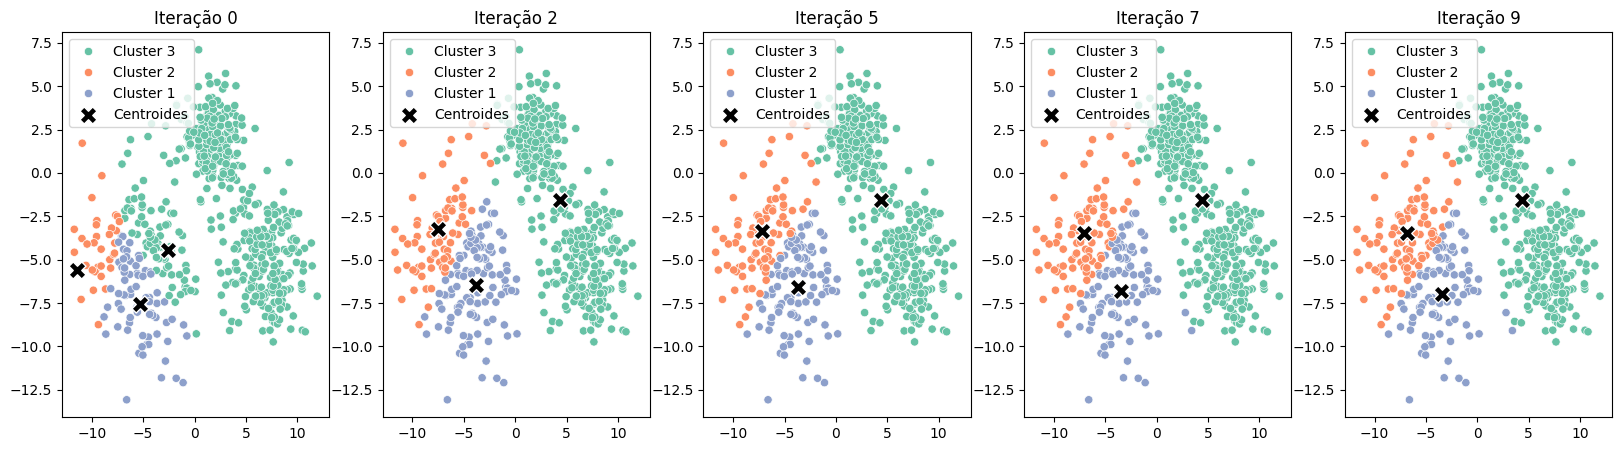

In [71]:
lista_boba = [0, 2, 5, 7, 9]

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# loop apenas para ajustar a legenda do gráfico
for cada_ponto in range(len(lista_de_pontos)):
    rotulos_modificados = [f"Cluster {int(valor + 1)}" for valor in lista_de_pontos[cada_ponto][:, -1]]
    lista_de_pontos[cada_ponto] = lista_de_pontos[cada_ponto].astype(object)
    lista_de_pontos[cada_ponto][:, -1] = rotulos_modificados

for i, (centroides, pontos) in enumerate(zip(lista_de_centroides, lista_de_pontos)):
    # plotando os pontos, e definindo a cor de acordo com a última coluna (do centroide mais próximo)
    sns.scatterplot(x=pontos[:, 0], y=pontos[:, 1], hue=pontos[:, -1], palette='Set2', ax=axs[i])

    # plota os centroides, assim como o Ruben pediu, com uma grande cruz preta
    sns.scatterplot(x=centroides[:, 0], y=centroides[:, 1], color='black', marker='X', s=150, ax=axs[i], label="Centroides")

    # apenas um título para nortear as iterações
    axs[i].set_title(f"Iteração {lista_boba[i]}")

plt.show()

## Distâncias Quadradas

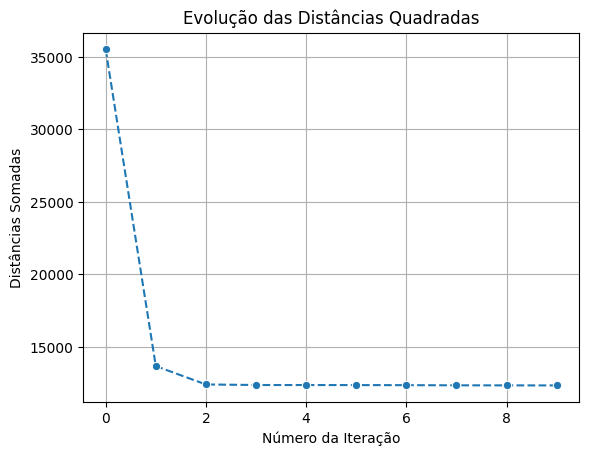

In [72]:
sns.lineplot(data=lista_distancias, marker="o", linestyle="--")
plt.title('Evolução das Distâncias Quadradas');
plt.ylabel("Distâncias Somadas")
plt.xlabel("Número da Iteração")
plt.grid(True)